# Optical Communications Project -- Team 8

In [1]:
# fibre specification
n1 = 1.46
n2 = 1.45
lambda_ = 820e-9
a = 5.1e-6

In [2]:
#import relevant packages
import numpy as np
import matplotlib.pyplot as plt

## 1. Calculate the V-parameter for the fibre.

In [3]:
V = 2*np.pi*a/lambda_*np.sqrt(n1*n1-n2*n2)
print(V)

6.666266729164944


## 2. Decide whether you are going to consider the {TE, TM, EH, HE} or LP modes for all of the subsequent tasks.


## 3. Identify all the modes that the fibre supports and the propagation constant and effective index for each mode. Summarise the results as a table.

6.666266729164944


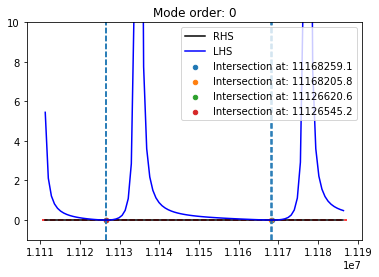

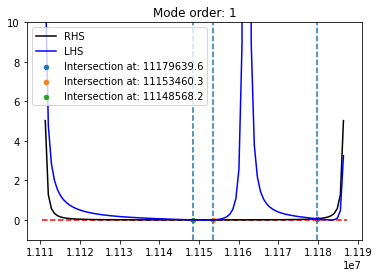

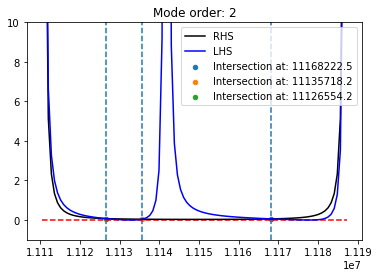

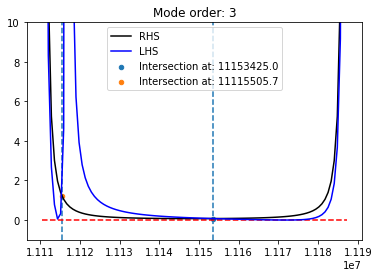

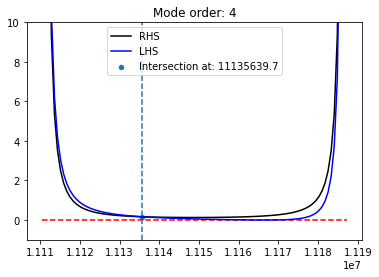

[['TE01', 0, 11168259.1, 1.4575365860267546, 3.3129360121055274], ['TM01', 0, 11168205.8, 1.457529630000812, 3.317606184992294], ['TM02', 0, 11126620.6, 1.4521024680864505, 5.9263215683836235], ['TE02', 0, 11126545.2, 1.452092627854629, 5.930002463491131], ['HE11', 1, 11179639.6, 1.4590218215472377, 2.088160656571897], ['EH11', 1, 11153460.3, 1.4556052382458555, 4.423522301785097], ['HE12', 1, 11148568.2, 1.4549667846902334, 4.733427741729404], ['HE21', 2, 11168222.5, 1.4575318094686027, 3.3161436324966624], ['EH21', 2, 11135718.2, 1.4532897690548743, 5.463824832771996], ['HE22', 2, 11126554.2, 1.452093802418109, 5.929563220758515], ['HE31', 3, 11153425.0, 1.4556006313468728, 4.425836721801819], ['EH31', 3, 11115505.7, 1.4506518952393332, 6.446041713477675], ['HE41', 4, 11135639.7, 1.4532795242511873, 5.467984558107816]]
| Mode name | Mode | beta |neffective |
| TE01 |  0   | 11168259.1 | 1.4575365860267546 |
----------------------------------------------
| TM01 |  0   | 11168205.8 | 1

In [5]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special as ss
from scipy.optimize import fsolve
import numpy as np
from scipy.optimize import fsolve
# fibre specification
global n1
global n2
global lambda_ 
global a 
global RNA
global RNB
global k0
#Defining useful vars 
n1 = 1.46
n2 = 1.45
lambda_ = 820e-9
a = 5.1e-6
RNA = 1.1428
RNB = 0.996
k0=2*np.pi/lambda_
#import relevant packages

#Find V
V = 2*np.pi*a/lambda_*np.sqrt(n1*n1-n2*n2)
print(V)
def j(pa, m):
    u=-ss.jv(m+1, pa)+m*ss.jv(m, pa)/pa
    l=pa*ss.jv(m, pa)
    return u/l

def k(qa, m):
    u=-ss.kn(m+1, qa)+m*ss.kn(m, qa)/qa 
    l= qa*ss.kn(m, qa)
    return u/l

def b(pa):
    p=pa/a
    b=np.sqrt((n1*k0)**2-p**2)
    return b
def pa(b):
    p=np.sqrt((n1*k0)**2-b**2)
    return p*a

def lhs(b, m):
    pa=np.sqrt((n1*k0)**2-b**2)*a
    qa=np.sqrt(b**2-(n2*k0)**2)*a
    t1=(j(pa, m)+k(qa, m))
    t2=(j(pa, m)+n2**2*k(qa, m)/n1**2)

    return t1*t2

def rhs(b, m):
    pa=np.sqrt((n1*k0)**2-b**2)*a
    qa=np.sqrt(b**2-(n2*k0)**2)*a
    t1=(1/(pa)**2+1/(qa)**2)
    t2=(1/(pa)**2+n2**2/(n1*qa)**2)
    return m**2*t1*t2 

def f(b):
   return lhs(b, m1)-rhs(b, m1)
global m1
LHS=[]
RHS=[]
btest=np.linspace(n2*k0,n1*k0, 100)
mi=[0, 1, 2, 3, 4] #Modes being investigated
m0=[['TE01', 'TM01', 'TM02', 'TE02'], ['HE11', 'EH11', 'HE12'], ['HE21', 'EH21', 'HE22'], ['HE31', 'EH31'], ['HE41']]
#Guesses based on plotted graphs from 
guesses=[[1.112, 1.113, 1.116, 1.1172], [1.114, 1.1152, 1.117, 1.1181], [1.112, 1.1132, 1.116, 1.118, 1.114, 1.1135], [1.1115, 1.115], [1.113], [min(btest)]]
solfull=[] #Full oslutios
for m in mi:
    LHS=[]
    RHS=[]
    paVals=[]
    m1=m
    solutions=[]
    for b in btest:
          LHS.append(lhs(b, m))
          RHS.append(rhs(b, m))
    solutions=[]
    for br in guesses[m]:
       sol=sp.optimize.root(f, br*1e7) # Find roots of LHS-RHS function, using initial guesses based on visual queues from graph   
       solutions.append(round(sol.x[0], 1)) #Append root solution
    s1=np.array(solutions)
    s1=np.flip(np.unique(s1))
    i=0
    for s in s1:
           plt.scatter(s,lhs(s, m), label="Intersection at: "+str(round(s, 1)), s=20 ) #Plot intersection point
           plt.vlines(s,-1,10, linestyle='--' ) #plot vertical line at intersection
           paVals.append(pa(s))
           solfull.append([m0[m][i],m, s,s/k0, pa(s)])
           i+=1
    plt.plot(btest, RHS, 'k', label="RHS")
    plt.plot(btest, LHS, 'b', label="LHS")
    plt.hlines(0, btest[0],btest[-1], linestyle='--', colors='r' )
    plt.ylim(-1, 10)
    plt.legend()
    plt.title("Mode order: "+str(m))
    plt.show()
    '''plt.plot(btest, f(btest))
    plt.hlines(0, btest[0],btest[-1], linestyle='--', colors='r' )
    plt.ylim(-1, 10)
    plt.legend()
    plt.title("Mode order: "+str(m))
    plt.show()'''


print(solfull )
print('| {:1} | {:^4} | {:>4} |{:<3} |'.format(*["Mode name","Mode", "beta", "neffective"]))


for row in solfull:
    print('| {:1} | {:^4} | {:>4} | {:<3} |'.format(*row))
    print('----------------------------------------------')
 

 

## 4. Excluding the fundamental mode {HE11/LP01}, pick one of the modes from your table for the tasks below.


[3.31294017] [5.92632125]


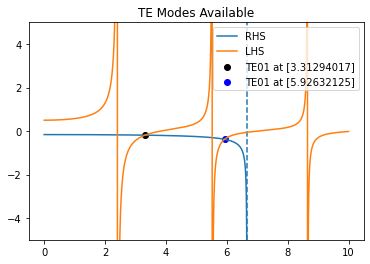

In [14]:
#Choosing TE Modes: 
def LHSTETM(pa):
    a= ss.jv(1, pa)/ss.jv(0,pa)
    return a/pa
    
def RHSTE(pa):
    qa=np.sqrt(V**2-pa**2)
    a= -ss.kn(1, qa)/ss.kn(0,qa)
    return a/qa

def f(pa):

   return LHSTETM(pa)-RHSTE(pa)

def pros(LHS, RHS,f,  g1=1, g2=5):#processign code
   ymax=5
   ymin=-5
   x=np.linspace(0, 10, 5000)
#plt.vlines(x[RHS(x).argmax], -5, 5)
   plt.plot(x, RHS(x), label="RHS")
   plt.plot(x, LHS(x), label="LHS")
   sol=sp.optimize.root(f, g1)#finding roots of difference function
   sol2=sp.optimize.root(f, g2)
   plt.scatter(sol.x, RHS(sol.x), color='k', label="TE01 at "+ str(sol.x))
   plt.scatter(sol2.x, LHS(sol2.x), color='b', label="TE01 at "+ str(sol2.x))
   print(sol.x, sol2.x)#plotting intersections
   plt.legend()
   plt.ylim(-5, 5)
   plt.vlines(V, -5, 5, linestyle='--')


#TE first couple moes

pros(LHSTETM, RHSTE,f, 4.5, 6.2)
plt.title("TE Modes Available")
plt.show()

## 5. Plot maps in the plane perpendicular to the fibre axis of the amplitude of all three E-fields within the fibre. You will need to fix one of the A or B parameters, e.g. to unity, and use the relevant equations to calculate the other values. You can choose to do this for either the {radial, tangential, z} or {x, y, z} E-field components.


## 6. Plot the spatial distribution of the total intensity of the mode in the direction perpendicular to the fibre axis, e.g. sum of the square modulus of the field in the {radial, tangential} or {x, y} directions.

## 7. Calculate numerically the waveguide dispersion $ 𝐷_w = − \frac{\lambda}{c} [\frac{\partial^2n_{eff}}{\partial\lambda^2}]_w = − \frac{\lambda}{c} [\frac{\partial^2n_{m}}{\partial\lambda^2}]_w $ for the mode selected, see notes for lecture 6. For example, calculate this from the effective index calculated for three (or more) wavelengths close to the wavelength of light to be transmitted.

## 8. Using your result to part 6, calculate the fraction of energy in the core and cladding by summing over the relevant regions. Use equation $𝑛^2_{eff} \approx 𝑛^2_1\Gamma(𝑉) + 𝑛^2_2(1 − \Gamma(𝑉)) $ to calculate an approximate value for the effective index. Compare this value of the effective index to the value you calculated directly and comment on your result.